# Introduction to Pandas

In this tutorial, we will learn how to use Pandas by analyzing a real-world dataset.

The dataset that we are going to analyze is the TED talk dataset which is available on Kaggle (https://www.kaggle.com/datasets/ahmadfatani/ted-talks-dataset). The dataset contains information about all video recordings of TED Talks uploaded to the official TED.com website until April 18th, 2020. It contains information about all talks including the number of views, tags, posted-date, speakers and titles.

Note that you do not have to download the dataset from Kaggle since the data is already contained in the Github repository.

In [1]:
import pandas as pd

ted_df = pd.read_csv('../ted_talk_dataset/ted_main.csv')

## Visualize the distribution of comments

We want to analyze the distribution of comments. In other words, we are looking for a plot that summarizes how often particular values occur. This plot should answer the question of whether there are a lot of low values or high values, etc.

There are two different libraries that might come in handy for this task. See "Visualization" on https://pandas.pydata.org/pandas-docs/version/1.2.2/ecosystem.html

In this tutorial, we are going to use the most famous one ([Matplotlib](https://matplotlib.org/)) which is natively supported by Pandas.

### Creating our first plot (Line Plot)

Panda's series and dataframes provide easy access to Matplotlib via the `plot()` function (or an alternative backend).

As can be seen, by default, `plot()` creates a so-called **line plot**. The x-axis denotes the row-index and the y-axis denotes the number of comments (the value in the comment field).

<Axes: >

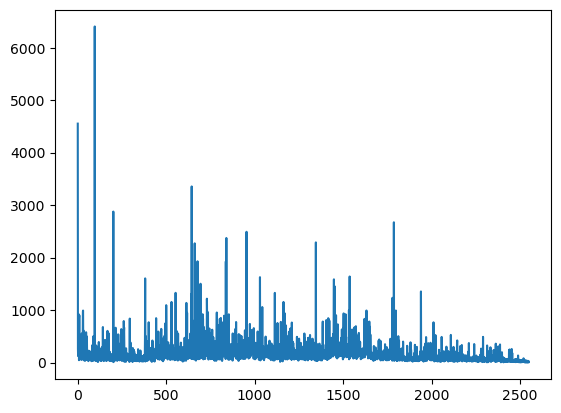

In [2]:
ted_df.comments.plot()

Obviously, this plot is not really useful for how often certain values occur. The only thing we can see in the plot is that most values are small and that there are only a few high values. Hence, we need to find a plot that is better suited for our task. 

According to the documentation, the following plot types are available:

- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot (DataFrame only)
- ‘hexbin’ : hexbin plot (DataFrame only)

Let's check them to find out which ones are useful ...

### Other types of plots

#### Bar Plot

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that are proportional to the values that they represent. 

Unfortunately, this type of plot isn't really useful for our task.

<Axes: >

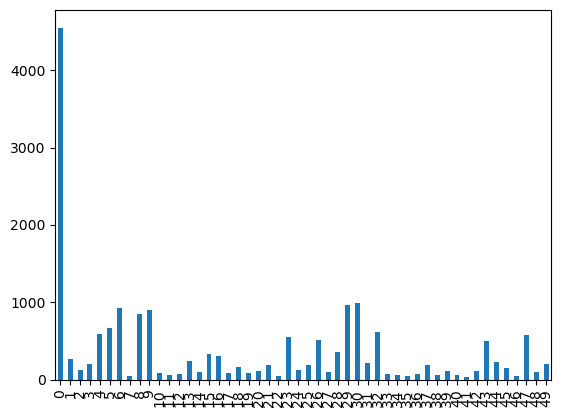

In [3]:
ted_df.comments.iloc[:50].plot(kind='bar')

<Axes: >

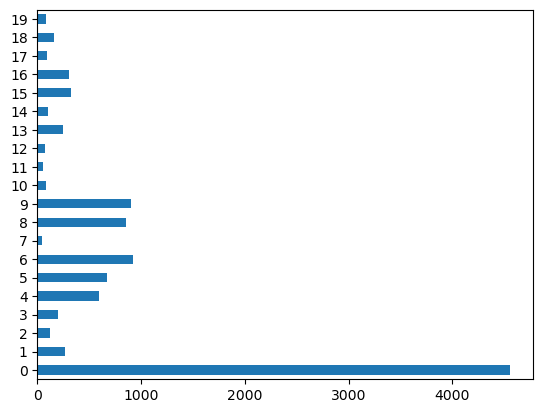

In [4]:
ted_df.comments.iloc[:20].plot(kind='barh')

#### Hist Plot
Computes and plots the histogram of the data. By default, the number of bins is 10 and we might want to alter this.

This type of plot might be a good candidate for answering our question. However, we might have to tweak the parameters of the plot.

<Axes: ylabel='Frequency'>

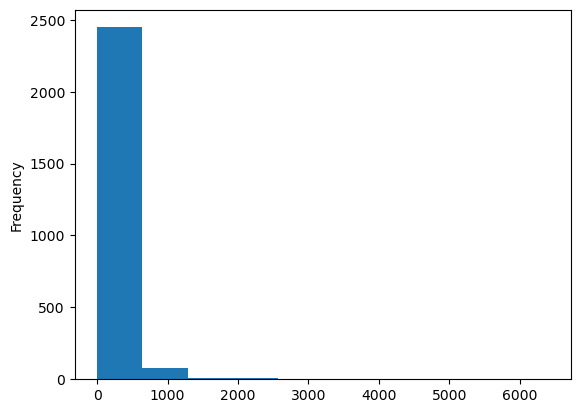

In [5]:
ted_df.comments.plot(kind='hist')

<Axes: ylabel='Frequency'>

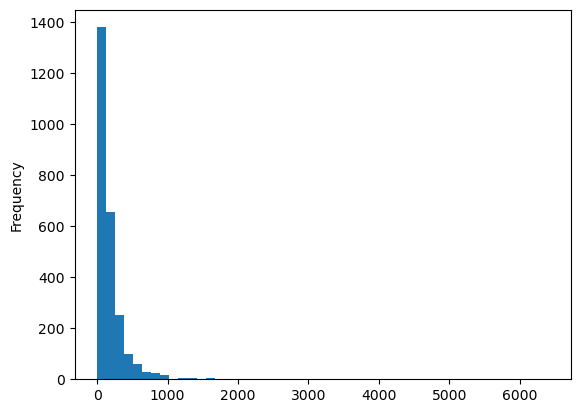

In [6]:
ted_df.comments.plot(kind='hist', bins=50)

#### Box Plot

A box plot (also called Box-and-Wisher Plot) is a method for graphically demonstrating the locality, spread, and skewness groups of numerical data through their quartiles.

The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box to the farthest data point lying within 1.5x the inter-quartile range (IQR) from the box. Flier points (Outliers) are those past the end of the whiskers. <br/>
See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

<Axes: >

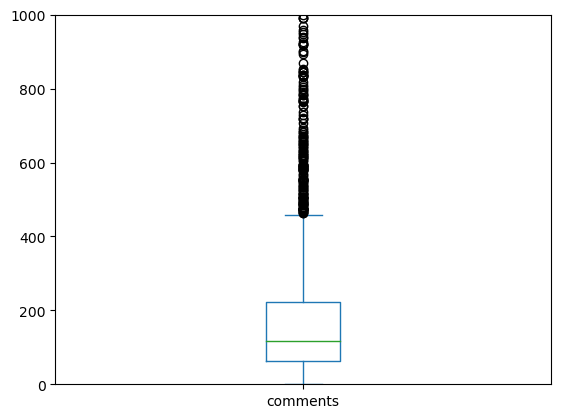

In [7]:
ted_df.comments.plot(kind='box', ylim=(0, 1000))

#### KDE Plot

Performs kernel density estimation (KDE) to estimate the probability density function (PDF).

This looks like an interesting plot as well. However, since the y-axis shows the estimated density, it's not possible to draw conclusions such as "How many talks have 50 to 100 comments?".

<Axes: ylabel='Density'>

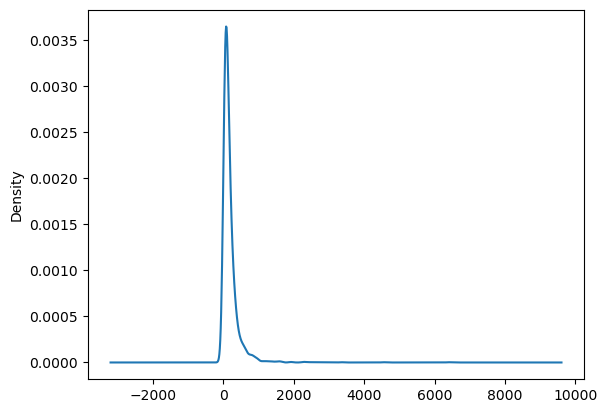

In [8]:
ted_df.comments.plot(kind='kde')

#### Area Plot

An area plot is similar to a line plot except that the area under the curve is colored.

<Axes: >

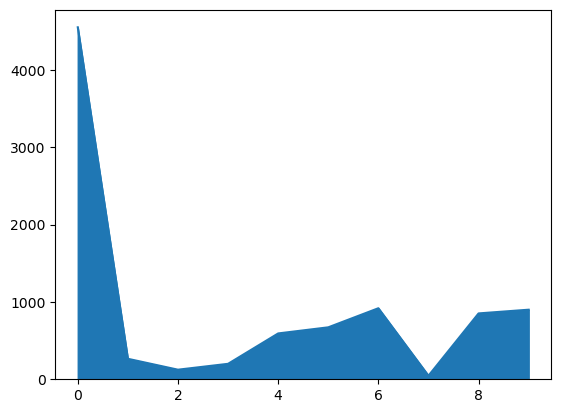

In [9]:
ted_df.comments.iloc[:10].plot(kind='area')

### Tweaking our plot(s)

As we have seen, the hist plot and the box plot are the most useful plots for our task. The KDE plot might be an interesting candidate as well. However, since only the density is shown on the y-axis it's not an ideal plot if we want to draw conclusions about the precise number of samples that are within a certain range.

Let's take another look at our hist plot. Note that the y-axis simply shows how many TED talks occur in the dataset with a value (number of comments) that lies within a certain bin range. The x-axis simply denotes the "number of comments" value.

<Axes: ylabel='Frequency'>

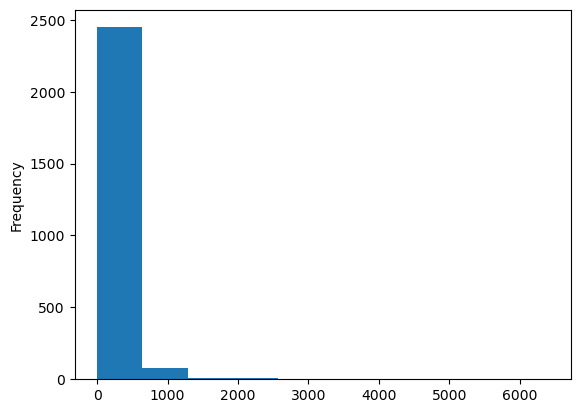

In [10]:
ted_df.comments.plot(kind='hist')

Obviously, the first box that ranges from 0 to ~650 has the most comments. Unfortunately, that's a pretty large box size (remember that the default number of bins is 10) and we cannot really say what's going on inside this box (we don't know what the distribution of data looks like within the box). In other words, we cannot really say how many talks there are with 0-50 comments, 51-100 comments, etc.

If we are really interested in the distribution of MOST of the data, it might be best considering TED talks that have less than 1000 comments.

In [11]:
filtered_ted_df = ted_df[ted_df.comments < 1000]

<Axes: ylabel='Frequency'>

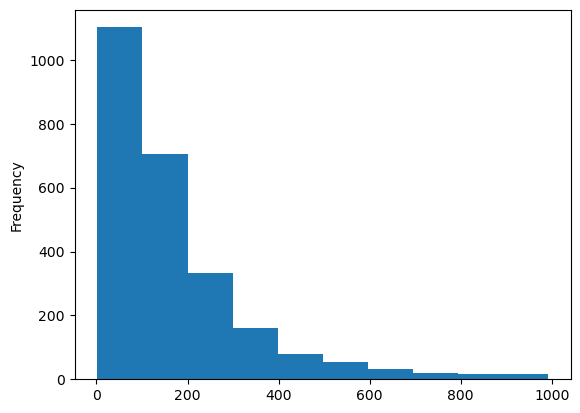

In [12]:
filtered_ted_df.comments.plot(kind='hist')

Ok, it looks much better now. However, it might be a good idea to alter the number of bins as each bin range is still pretty large (apparently around 100). So, let's double the number of bins.

<Axes: ylabel='Frequency'>

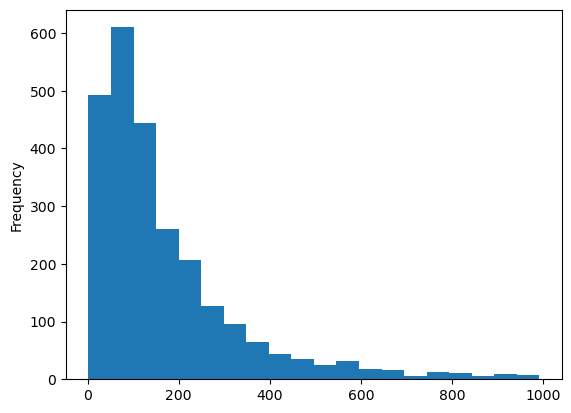

In [13]:
filtered_ted_df.comments.plot(kind='hist', bins=20)

Last but not least, we can start to tweak the design of our plot.

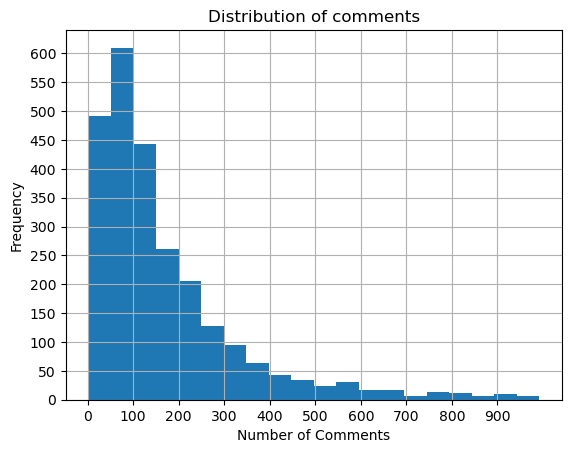

In [22]:
ax = filtered_ted_df.comments.plot(kind='hist', 
                              bins=20, 
                              xticks=range(0, 1000, 100), # Sets the tick locations on the x-axis
                              yticks=range(0, 650, 50), # Sets the tick locations on the y-axis
                              xlabel='Number of Comments', # Add an axis label to the x-axis
                              grid=True,
                              title='Distribution of comments', # Add a plot title,
                             )

# For enabling horizontal grid line only run:
#import matplotlib.pyplot as plt
#plt.grid(axis='y')